In [60]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#4.1 Import the dataset file into a Pandas dataframe 
#and identify the count of missing values per column. 


# Import the weight file into Pandas
Data = pd.read_csv('/Users/datascience/Desktop/Data Science/ADS 500B/Module 3/avocado.csv', header=0, sep=',')

# Calling the pandas data frame
df = pd.DataFrame(Data)


# Identify the Count of missing values per column
print (df.isnull().sum())

print('Total number of missing values = ', df.isnull().sum().sum())

             Date  AveragePrice  TotalVolume    Small      Large  AllSizes  \
0      2015-12-27          1.33     64236.62  1036.74   54454.85     48.16   
1      2015-12-20          1.35     54876.98   674.28   44638.81     58.33   
2      2015-12-13          0.93    118220.22   794.70  109149.67       NaN   
3      2015-12-06          1.08     78992.15  1132.00   71976.41     72.58   
4      2015-11-29          1.28     51039.60   941.48   43838.39     75.78   
...           ...           ...          ...      ...        ...       ...   
18244  2018-02-04          1.63     17074.83  2046.96    1529.20      0.00   
18245  2018-01-28          1.71     13888.04  1191.70    3431.50      0.00   
18246  2018-01-21          1.87     13766.76  1191.92    2452.79    727.94   
18247  2018-01-14          1.93     16205.22  1527.63    2981.04    727.01   
18248  2018-01-07          1.62     17489.58  2894.77    2356.13    224.53   

       TotalBags          Type    Year            Region  
0   

In [67]:
#4.1(b)Handle missing values based on column typ

#Replace Categorical Variable with the most frequent Count
df['Type'].fillna(value=df['Type'].value_counts().index[0],inplace =True)

#Foward Fill Date
df['Date'].fillna(method='ffill', inplace=True)

#Replace missing value from next row value
df['Region'].fillna(method='bfill', inplace=True)
df['Year'].fillna(method='bfill', inplace=True)

#Replace missing values with the mean value for each column
df.fillna(df.mean(), inplace = True)



In [87]:
#4.2 Convert the fields Type, Year and Region to categorical data type 
#and subset the dataframe to exclude region “TotalUS” and “West” 
#and sort the dataframe by date in ascending order.

#Convert the fields Type, Year and Region to categorical data type 
df['Type']=pd.Categorical(df.Type)
df['Year']=pd.Categorical(df.Year)
df['Region']=pd.Categorical(df.Region)

#Exclude TotalUS and West
new_df = pd.DataFrame(df)
Remove = new_df[ new_df['Region'] == 'TotalUS'].index
Remove = new_df[ new_df['Region'] == 'West'].index
new_df.drop(Remove, inplace=True)

#Sort the dataframe by date in ascending order
new_df['Date'] =pd.to_datetime(new_df["Date"])
new_df = new_df.sort_values(by="Date")

#Group by years and find the mean average price
new_df.groupby('Year', as_index=False)['AveragePrice'].mean()



,Year,AveragePrice
0,2015.0,1.378280
1,2016.0,1.341996
2,2017.0,1.515953
3,2018.0,1.347337


Text(0, 0.5, 'Region')

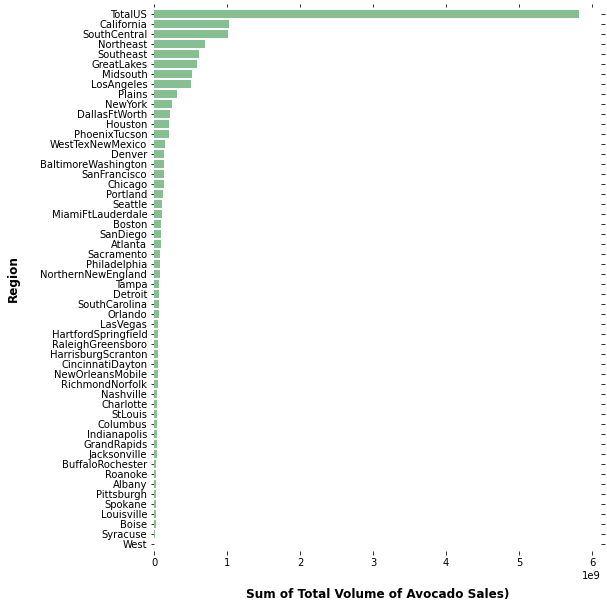

In [98]:
#4.3 Sum up the total volume of avocado sales by region and create a horizontal bar plot using Matplotlib. 
#Which state from the region has the highest sales of avocados by volume? 
#Subset the data for that state, create a histogram of mean price and interpret it.

#Used Groupby to sum up the total volume of avocado sales by region & sorting it
x = new_df.groupby(by='Region')['TotalVolume'].sum().sort_values()

#Customize and Cleanup matplotlib 
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
ax.set_xlabel("Sum of Total Volume of Avocado Sales)", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Region", labelpad=20, weight='bold', size=12)

array([[<AxesSubplot:title={'center':'AveragePrice'}>]], dtype=object)

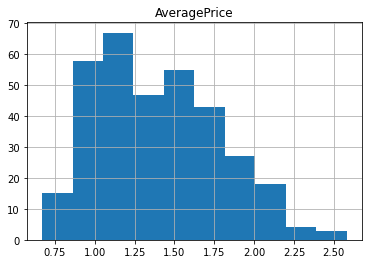

In [115]:
#4.3 Subset the data for that state, create a histogram of mean price and interpret it.
Cali = new_df[new_df["Region"].isin(['California'])]
Cali.hist(column= 'AveragePrice')



In [117]:
#4.3 Obtain the correlation index between mean price and total volume for that state

Data_mean = Cali["AveragePrice"]
Data_volume = Cali["TotalVolume"]
correlation = Data_mean.corr(Data_volume)
print(correlation)

-0.7885756942223386
